In [1]:
import pandas as pd
donnees_techniques = pd.read_csv("D:/Formations/Data analysis Python/Data/RT_donnees_techniques_Par_Tch.csv")

In [2]:
prof_mur = donnees_techniques["Prof_Mur"]
prof_toit = donnees_techniques["Prof_Toit"]

In [3]:
# Calcul de l'épaisseur forée dans le socle
epaisseur_socle = prof_mur - prof_toit

In [4]:
epaisseur_socle.describe()

count    227.000000
mean      29.091322
std       17.554799
min      -52.450000
25%       19.265000
50%       29.200000
75%       39.095000
max       81.150000
dtype: float64

Afin de déterminer l'épaisseur de socle foré, nous avons fait une soustraction entre la profondeur du mur et celui du toit pour chacun des forages. Cela signifie que pour chaque forage, les valeurs de profondeur du mur doivent être supérieures à celles du toit. En cas de valeur négative pour l'épaisseur de socle, on a affaire à une valeur aberrante et la ligne doit être supprimée. On va donc procéder à une suppression de toutes les lignes avec les valeurs négatives.

In [5]:
# Garder uniquement les lignes avec une épaisseur positive
epaisseur_socle1 = epaisseur_socle[epaisseur_socle > 0]
print(epaisseur_socle1.describe())

count    218.000000
mean      30.824358
std       15.345397
min        0.330000
25%       21.320000
50%       29.850000
75%       39.787500
max       81.150000
dtype: float64


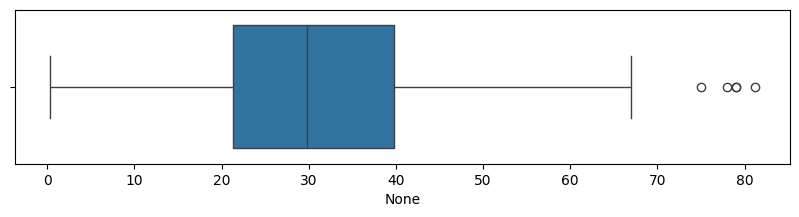

In [6]:
#Visualisation des données après suppression des lignes négatives
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.boxplot(x=epaisseur_socle1)
plt.show()

En considérant les statistiques après la première correction et le diagramme en moustaches, on remarque que la valeur minimale est de 0.33 m. Un tel épaisseur de socle peut également être considéré comme inutile dans notre cas d'étude. Nous allons considérer une valeur minimale de 5m pour effectuer notre étude

In [7]:
# Filtrer les valeurs faibles (< 5 m)
valeurs_faibles = epaisseur_socle[(epaisseur_socle > 0) & (epaisseur_socle < 5)]

# Afficher les lignes correspondantes avec les colonnes utiles
donnees_techniques.loc[valeurs_faibles.index, ['Prof_Toit', 'Prof_Mur']]

,Prof_Toit,Prof_Mur
128,26.00,29.34
331,27.00,28.17
479,30.48,30.81
782,22.00,23.21
976,20.00,23.21


In [8]:
# Afficher Prof_Toit, Prof_Mur et l'épaisseur de socle pour les cas faibles
donnees_techniques.loc[valeurs_faibles.index, ['Prof_Toit', 'Prof_Mur']].assign(Epaisseur_Socle=valeurs_faibles)

,Prof_Toit,Prof_Mur,Epaisseur_Socle
128,26.00,29.34,3.34
331,27.00,28.17,1.17
479,30.48,30.81,0.33
782,22.00,23.21,1.21
976,20.00,23.21,3.21


In [9]:
epaisseur_socle_valide = epaisseur_socle[epaisseur_socle >= 5]
print(epaisseur_socle_valide.describe())

count    213.000000
mean      31.504460
std       14.857287
min        5.250000
25%       22.000000
50%       30.000000
75%       40.420000
max       81.150000
dtype: float64


In [10]:
import numpy as np

# Taille de l'échantillon après nettoyage
n = len(epaisseur_socle_valide)
# Calcul du nombre de classes avec la formule de Sturges
C = int(1 + 3.3 * np.log10(n))

print(f"Nombre de classes (Sturges) : {C}")

Nombre de classes (Sturges) : 8


In [11]:
#Détermination des bornes min et max
xmin = epaisseur_socle_valide.min()
xmax = epaisseur_socle_valide.max()

# Amplitude des classes
I = (xmax - xmin) / C

print(f"Amplitude des classes : {I:.2f}")

Amplitude des classes : 9.49


In [12]:
# xmin, xmax et I sont déjà définis
bornes_classes = np.arange(xmin, xmax + I, I)

# Affichage des intervalles
classes = []
for i in range(len(bornes_classes) - 1):
    classes.append(f"[{bornes_classes[i]:.2f} – {bornes_classes[i+1]:.2f}[")  # intervalle semi-ouvert

print("Liste des classes :")
for c in classes:
    print(c)

Liste des classes :
[5.25 – 14.74[
[14.74 – 24.23[
[24.23 – 33.71[
[33.71 – 43.20[
[43.20 – 52.69[
[52.69 – 62.18[
[62.18 – 71.66[
[71.66 – 81.15[


In [13]:
# Histogramme : counts = effectif, bin_edges = bornes
counts, bin_edges = np.histogram(epaisseur_socle_valide, bins=bornes_classes)

# Affichage des classes et effectifs
print("Liste des classes avec effectifs :\n")
for i in range(len(counts)):
    print(f"[{bin_edges[i]:.2f} – {bin_edges[i+1]:.2f}[ : {counts[i]} valeurs")

Liste des classes avec effectifs :

[5.25 – 14.74[ : 26 valeurs
[14.74 – 24.23[ : 45 valeurs
[24.23 – 33.71[ : 62 valeurs
[33.71 – 43.20[ : 41 valeurs
[43.20 – 52.69[ : 21 valeurs
[52.69 – 62.18[ : 12 valeurs
[62.18 – 71.66[ : 1 valeurs
[71.66 – 81.15[ : 5 valeurs


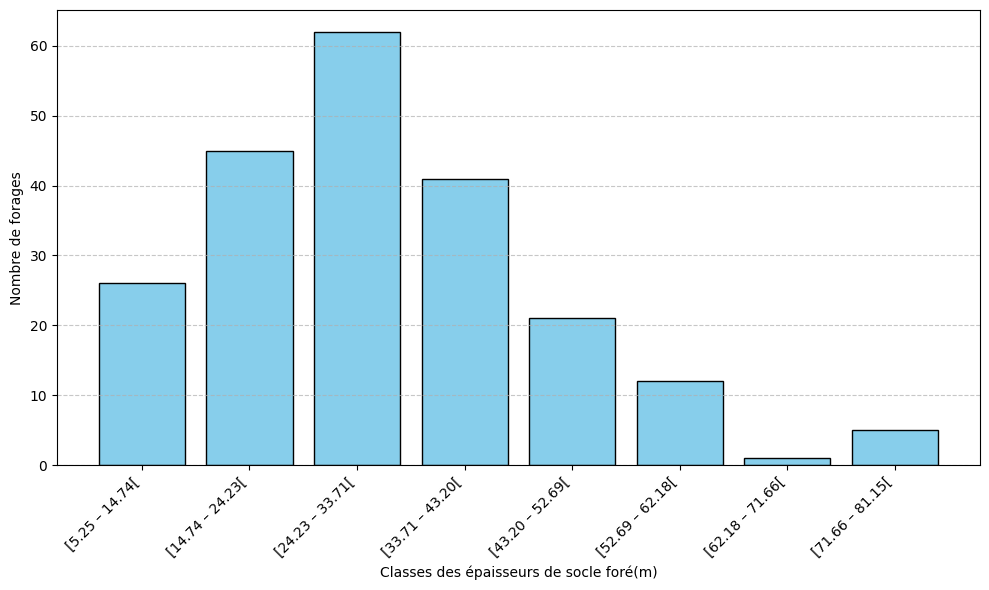

In [14]:
# Création des étiquettes de classes pour l'axe x
etiquettes_classes = [f"[{bin_edges[i]:.2f} – {bin_edges[i+1]:.2f}[" for i in range(len(counts))]

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(etiquettes_classes, counts, color='skyblue', edgecolor='black')

plt.xlabel("Classes des épaisseurs de socle foré(m)")
plt.ylabel("Nombre de forages")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
# Transformer la Series en DataFrame avec un nom de colonne
epaisseur_socle = epaisseur_socle_valide.to_frame(name="Epaisseur_Socle")

# Exporter en CSV
epaisseur_socle.to_csv("D:/Formations/Data analysis Python/Data/epaisseur_socle.csv", index=False)